# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install scipy

import scipy as sci

%matplotlib inline


In [3]:
data = pd.read_csv('data\M10_E1\previsao_de_renda.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37



1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
#tratamento somente com valores numéricos
data_num = data[['posse_de_veiculo',
                 'posse_de_imovel',
                 'qtd_filhos',
                 'idade',
                 'tempo_emprego',
                 'qt_pessoas_residencia',
                 'mau',
                 'renda']]
data_num.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


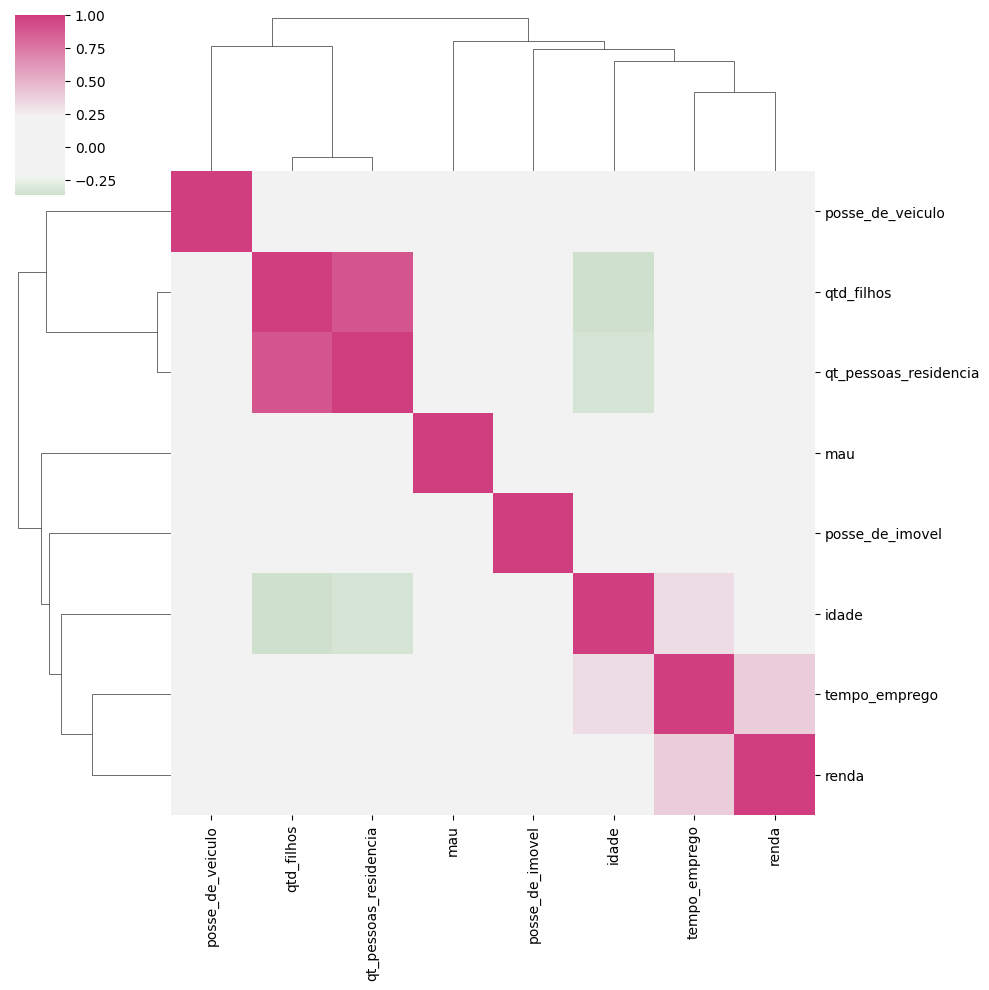

In [5]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(data_num.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<function matplotlib.pyplot.show(close=None, block=None)>

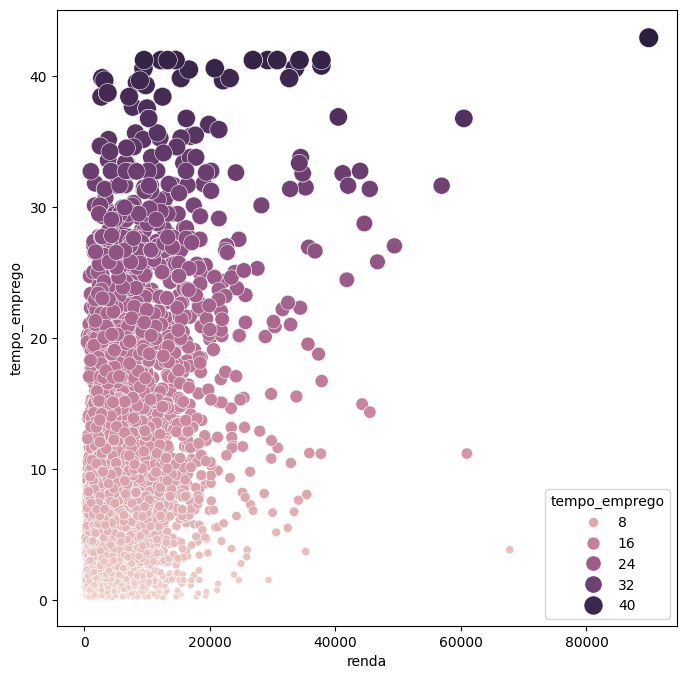

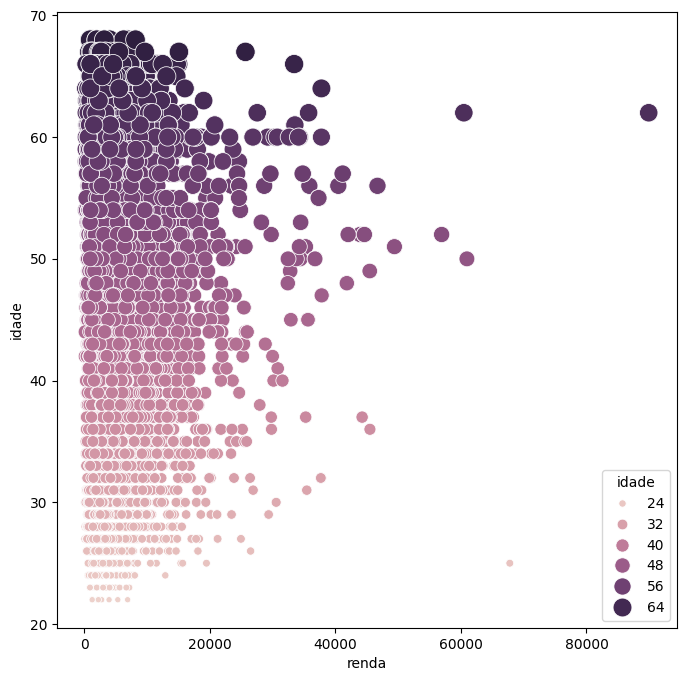

In [6]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='renda', y='tempo_emprego', hue='tempo_emprego', size='tempo_emprego', sizes=(20, 200))
plt.show

plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='renda', y='idade', hue='idade', size='idade', sizes=(20, 200))
plt.show

3) Na su aopinião, há outliers na variável renda?

Na minha visão há sim alguns outliers. Entretanto, não é possível concluir que esses outliers se tratam de um erro na coleta dos dados ou se a renda desses indivíduos é realmente tão alta (o que também é uma possibilidade).

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='log_renda'>

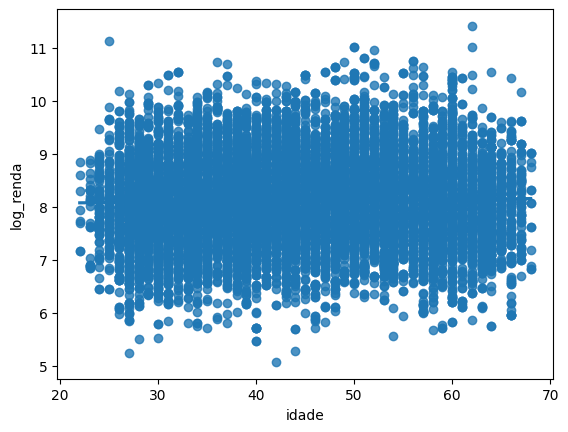

In [14]:
renda_log = data['renda'].copy() #traz a coluna de renda para a variavel renda_log, que é uma Series
renda_log = pd.DataFrame(renda_log) #como precisamos de um Dataframe, fazemos a transformação

renda_log['log_renda'] = np.log(renda_log) #criar a coluna de logaritmos para a normalização da curva
renda_log['idade'] = data['idade'] #traz a coluna de idades

renda_log
sns.regplot(x=data['idade'], y=renda_log['log_renda'], data = renda_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do logaritmo nesse caso piorou a análise devido a grande dispersão dos pontos. Talvez a utilização desse método seja mais adequada em casos onde há maior convergência dos pontos em uma linha exponencial, além disso, devemos julgar se realmente é necessário analisar a tendência, como em gráficos que acompanham um mesmo objeto de estudo ao longo do tempo, por exemplo a plotagem de um gráfico de análise de coeficientes de atrito em um sistema de freios ao longo de sucessivos testes.

Acredito que eu possa ter cometido algum erro na plotagem do gráfico e fico à disposição de receber feedback quanto a isso.